🚀 Initializing...
Libraries loaded. SHAP version: 0.48.0
Kaggle path not found. Trying to load 'Maternal Health Risk Data Set.csv' from the current directory.
📊 Dataset loaded: 1014 rows × 7 columns


# ============== Exploratory Data Analysis (EDA) ============== #

📋 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


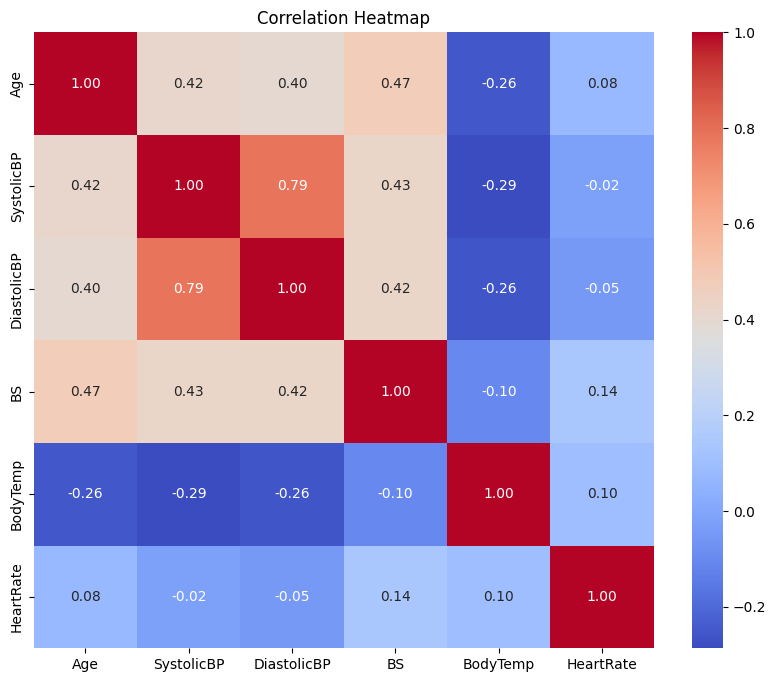



# ============== Model Preprocessing & Training ============== #
Training the RandomForestClassifier model...
✅ Model training complete.

📈 Model Performance on Test Data:
              precision    recall  f1-score   support

   high risk       0.96      0.95      0.95        55
    low risk       0.90      0.80      0.85        81
    mid risk       0.75      0.87      0.81        67

    accuracy                           0.86       203
   macro avg       0.87      0.87      0.87       203
weighted avg       0.87      0.86      0.86       203



# ============== Explainable AI (XAI) Setup ============== #
🔧 Creating SHAP explainer...
💡 SHAP Explainer created for classes: ['high risk' 'low risk' 'mid risk']




# ============== Interactive Prediction & Explanation ============== #

--- Enter Patient Data ---
Enter Age (e.g., 25): 25
Enter SystolicBP (e.g., 120): 120
Enter DiastolicBP (e.g., 80): 80
Enter BS (Blood Sugar, e.g., 7.5): 15
Enter BodyTemp in Fahrenheit (e.g., 98.6): 98
Enter HeartRate (e.g., 70): 86

📈 Predicted Probabilities:
   - High Risk: 89.89%
   - Low Risk: 5.27%
   - Mid Risk: 4.84%
------------------------------------
🎯 Final Predicted Risk Level: HIGH RISK
------------------------------------

🔍 Generating Explanation for the Prediction...
Displaying SHAP Force Plot for class 'high risk':


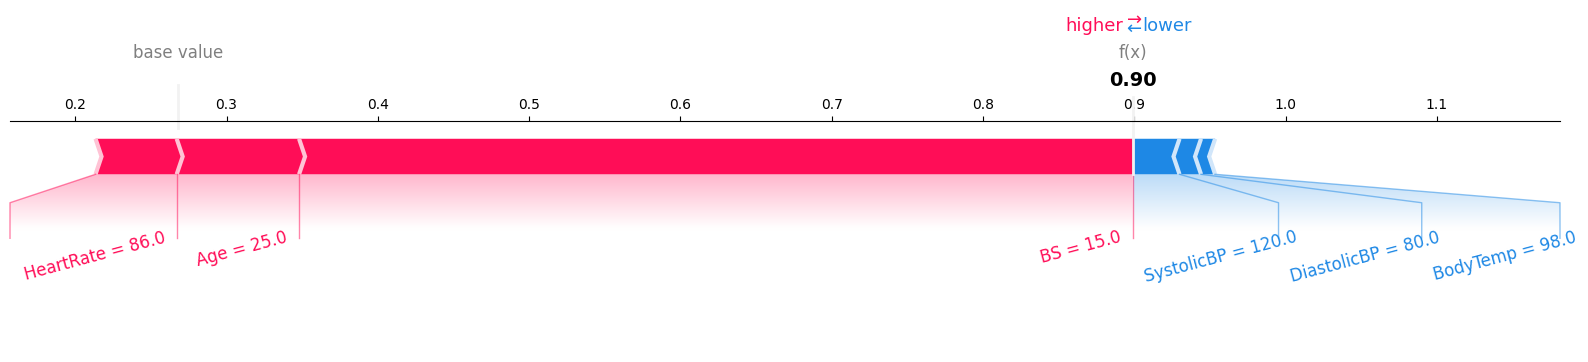


How to read the plot:
 - The 'base value' is the average model prediction for this class over the dataset.
 - Features in RED push the prediction HIGHER (towards this class).
 - Features in BLUE push the prediction LOWER (away from this class).
 - The size of the bar shows the magnitude of the feature's impact.


In [ ]:
# ===================================================================
# Part 1: Setup and Imports
# ===================================================================
print("🚀 Initializing...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import shap # For Explainable AI

print(f"Libraries loaded. SHAP version: {shap.__version__}")

# ===================================================================
# Part 2: Data Loading
# ===================================================================
try:
    df = pd.read_csv("/kaggle/input/maternal-health-risk-data/Maternal Health Risk Data Set.csv")
except FileNotFoundError:
    print("Kaggle path not found. Trying to load 'Maternal Health Risk Data Set.csv' from the current directory.")
    try:
        df = pd.read_csv("Maternal Health Risk Data Set.csv")
    except FileNotFoundError:
        print("❌ ERROR: Could not find the dataset file. Please ensure it's in the correct path.")
        # In a real script, you might exit here.
        # exit()

print(f"📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns")


# ===================================================================
# Part 3: Exploratory Data Analysis (EDA)
# ===================================================================
print("\n\n# ============== Exploratory Data Analysis (EDA) ============== #")
# (This section is unchanged and can be run as is)
print("\n📋 Basic Info:")
df.info()
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# ===================================================================
# Part 4: Preprocessing and Pipeline Definition
# ===================================================================
print("\n\n# ============== Model Preprocessing & Training ============== #")
X = df.drop(columns=['RiskLevel'])
y = df['RiskLevel']
numeric_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[('num', StandardScaler(), numeric_features)],
    remainder='passthrough'
)

# ===================================================================
# Part 5: Model Training and Evaluation
# ===================================================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

print("Training the RandomForestClassifier model...")
pipeline.fit(X_train, y_train)
print("✅ Model training complete.")

print("\n📈 Model Performance on Test Data:")
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


# ===================================================================
# Part 6: Explainable AI (XAI) Setup
# ===================================================================
print("\n\n# ============== Explainable AI (XAI) Setup ============== #")
print("🔧 Creating SHAP explainer...")

explainer = shap.TreeExplainer(
    model=pipeline.named_steps['classifier']
)

class_names = pipeline.named_steps['classifier'].classes_
print(f"💡 SHAP Explainer created for classes: {class_names}")

shap.initjs()


# ===================================================================
# Part 7: Interactive Prediction with Explanation (THE FIX IS HERE)
# ===================================================================
print("\n\n# ============== Interactive Prediction & Explanation ============== #")

def predict_risk_and_explain():
    """
    Takes user input, predicts the maternal health risk, and provides a
    visual SHAP explanation for the prediction.
    """
    print("\n--- Enter Patient Data ---")
    try:
        age = float(input("Enter Age (e.g., 25): "))
        systolic = float(input("Enter SystolicBP (e.g., 120): "))
        diastolic = float(input("Enter DiastolicBP (e.g., 80): "))
        bs = float(input("Enter BS (Blood Sugar, e.g., 7.5): "))
        temp = float(input("Enter BodyTemp in Fahrenheit (e.g., 98.6): "))
        hr = float(input("Enter HeartRate (e.g., 70): "))
    except ValueError:
        print("\n❌ Invalid input. Please enter numeric values only.")
        return

    user_data = pd.DataFrame([{
        'Age': age, 'SystolicBP': systolic, 'DiastolicBP': diastolic,
        'BS': bs, 'BodyTemp': temp, 'HeartRate': hr
    }])

    prediction_proba = pipeline.predict_proba(user_data)[0]
    predicted_class_index = np.argmax(prediction_proba)
    predicted_class_name = class_names[predicted_class_index]

    print(f"\n📈 Predicted Probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"   - {class_name.title()}: {prediction_proba[i]:.2%}")
    print(f"------------------------------------")
    print(f"🎯 Final Predicted Risk Level: {predicted_class_name.upper()}")
    print(f"------------------------------------")

    print("\n🔍 Generating Explanation for the Prediction...")

    user_data_transformed = pipeline.named_steps['preprocessor'].transform(user_data)

    # Use the modern, robust API: call the explainer on the data
    explanation = explainer(user_data_transformed, check_additivity=False)

    # Correctly extract the base value and shap values for the PREDICTED class
    base_value = explanation.base_values[0, predicted_class_index]
    shap_values_for_class = explanation.values[0, :, predicted_class_index]

    print(f"Displaying SHAP Force Plot for class '{predicted_class_name}':")
    shap.force_plot(
        base_value=base_value,
        shap_values=shap_values_for_class,
        features=user_data,
        matplotlib=True,
        show=True,
        text_rotation=15
    )

    print(
        "\nHow to read the plot:\n"
        " - The 'base value' is the average model prediction for this class over the dataset.\n"
        " - Features in RED push the prediction HIGHER (towards this class).\n"
        " - Features in BLUE push the prediction LOWER (away from this class).\n"
        " - The size of the bar shows the magnitude of the feature's impact."
    )

# --- Run the interactive function ---
predict_risk_and_explain()